# **Housing prices**

In [ ]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel('house.xlsx')

In [ ]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns= 4000

In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','').str.replace('[', '_').str.replace(']', '').str.replace('-', '_').str.replace('No._Housing_units', 'No_Housing_units')

In [ ]:
df.head()

,DATE,Price$,Unemployment_Rate,Employment_Rate,GDP,Working_Age_Population,Dwellings_and_Residential_Buildings,Essential_utilities_Cost_average,Housing_starts,No_Housing_units,Mortgage_Rate30_Year,Homes_for_sale,Building_Permits,Rental_Vacancy,Homeownership_Rate,Homeowner_non_natives,Homeowner_Vacancy_Rate
0,2002-01-01,353.674,5.805100,72.160431,3348727.5,182810138.0,169890.0,65.036667,5169,119061,6.971538,12.3,5143,3403,67.9,53.5,1.7
1,2002-04-01,362.148,5.915628,71.927346,3369339.0,183479837.3,174066.8,65.710000,5073,119483,6.813077,12.5,5143,3176,67.8,55.3,1.7
2,2002-07-01,371.499,5.776747,71.904513,3382935.3,184160854.6,174738.3,66.796667,5092,119909,6.289231,12.1,5236,3375,67.9,54.0,1.7
3,2002-10-01,380.025,5.937977,71.667275,3387355.3,184720284.3,177653.3,66.500000,5189,120350,6.075385,12.0,5466,3479,68.2,55.2,1.7
4,2003-01-01,387.964,5.956569,71.502400,3404858.5,185858601.6,181073.8,67.930000,5208,120792,5.840769,12.6,5419,3568,68.1,55.7,1.7


In [ ]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 81 
The number of columns (variables) is 17


In [ ]:
df.head()

,DATE,Price$,Unemployment_Rate,Employment_Rate,GDP,Working_Age_Population,Dwellings_and_Residential_Buildings,Essential_utilities_Cost_average,Housing_starts,No_Housing_units,Mortgage_Rate30_Year,Homes_for_sale,Building_Permits,Rental_Vacancy,Homeownership_Rate,Homeowner_non_natives,Homeowner_Vacancy_Rate
0,2002-01-01,353.674,5.805100,72.160431,3348727.5,182810138.0,169890.0,65.036667,5169,119061,6.971538,12.3,5143,3403,67.9,53.5,1.7
1,2002-04-01,362.148,5.915628,71.927346,3369339.0,183479837.3,174066.8,65.710000,5073,119483,6.813077,12.5,5143,3176,67.8,55.3,1.7
2,2002-07-01,371.499,5.776747,71.904513,3382935.3,184160854.6,174738.3,66.796667,5092,119909,6.289231,12.1,5236,3375,67.9,54.0,1.7
3,2002-10-01,380.025,5.937977,71.667275,3387355.3,184720284.3,177653.3,66.500000,5189,120350,6.075385,12.0,5466,3479,68.2,55.2,1.7
4,2003-01-01,387.964,5.956569,71.502400,3404858.5,185858601.6,181073.8,67.930000,5208,120792,5.840769,12.6,5419,3568,68.1,55.7,1.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DATE                                 81 non-null     object 
 1   Price$                               81 non-null     float64
 2   Unemployment_Rate                    81 non-null     float64
 3   Employment_Rate                      81 non-null     float64
 4   GDP                                  81 non-null     float64
 5   Working_Age_Population               81 non-null     float64
 6   Dwellings_and_Residential_Buildings  81 non-null     float64
 7   Essential_utilities_Cost_average     81 non-null     float64
 8   Housing_starts                       81 non-null     int64  
 9   No_Housing_units                     81 non-null     int64  
 10  Mortgage_Rate30_Year                 81 non-null     float64
 11  Homes_for_sale                    

In [ ]:
print('The total number of elements in the dataset housing_price_US is', df.size)

The total number of elements in the dataset housing_price_US is 1377


In [ ]:
df.duplicated().sum()

0

In [ ]:
round(df.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
Price$,81.0,519.9,106.7,353.7,438.9,507.6,562.1,871.6
Unemployment_Rate,81.0,6.2,2.0,3.6,4.7,5.7,7.4,13.2
Employment_Rate,81.0,69.5,2.1,62.4,67.8,70.1,71.3,72.2
GDP,81.0,4114652.4,432406.2,3348727.5,3820381.3,4044992.0,4453140.0,4951572.5
Working_Age_Population,81.0,199075199.8,6939986.3,182810138.0,195104005.9,201116681.2,205405713.6,207104199.1
Dwellings_and_Residential_Buildings,81.0,150434.3,37370.6,92679.5,120424.5,149354.3,174738.3,223861.3
Essential_utilities_Cost_average,81.0,93.2,15.0,65.0,82.5,92.9,104.0,123.7
Housing_starts,81.0,3786.8,1390.6,1577.0,2802.0,3561.0,5037.0,6361.0
No_Housing_units,81.0,132234.3,6264.9,119061.0,128439.0,132619.0,136818.0,142939.0
Mortgage_Rate30_Year,81.0,4.7,1.1,2.8,3.8,4.4,5.8,7.0


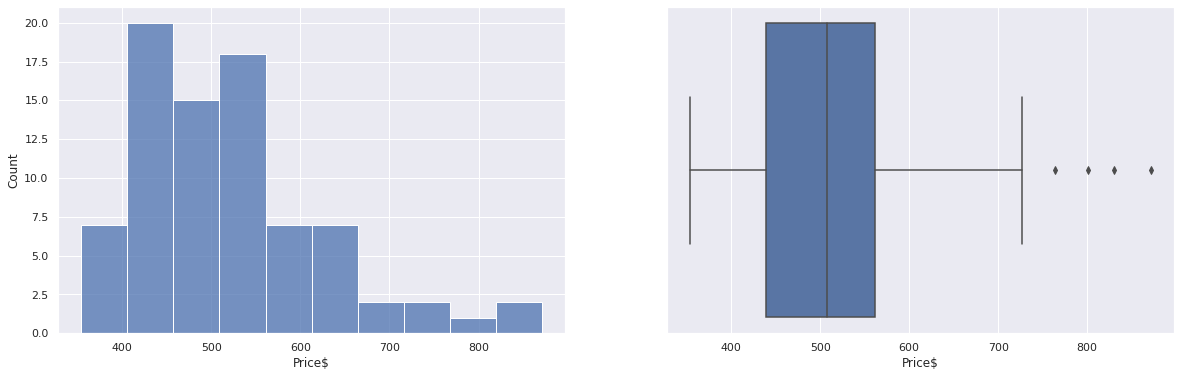

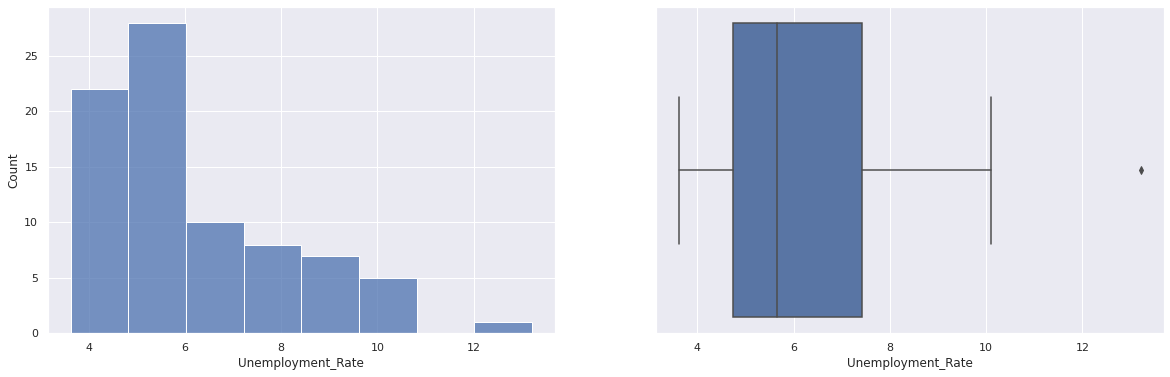

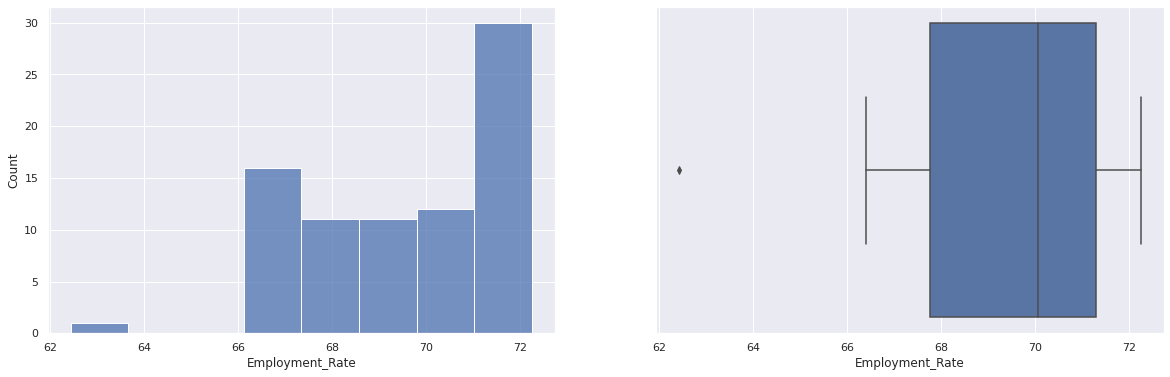

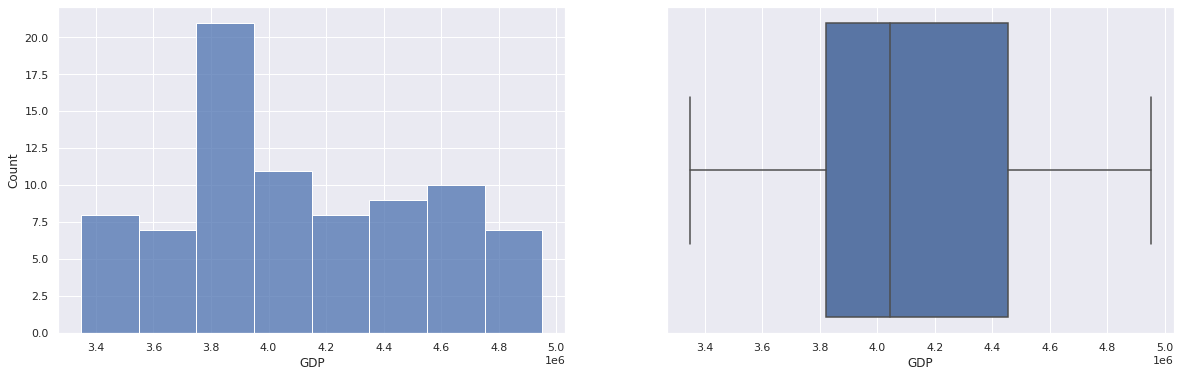

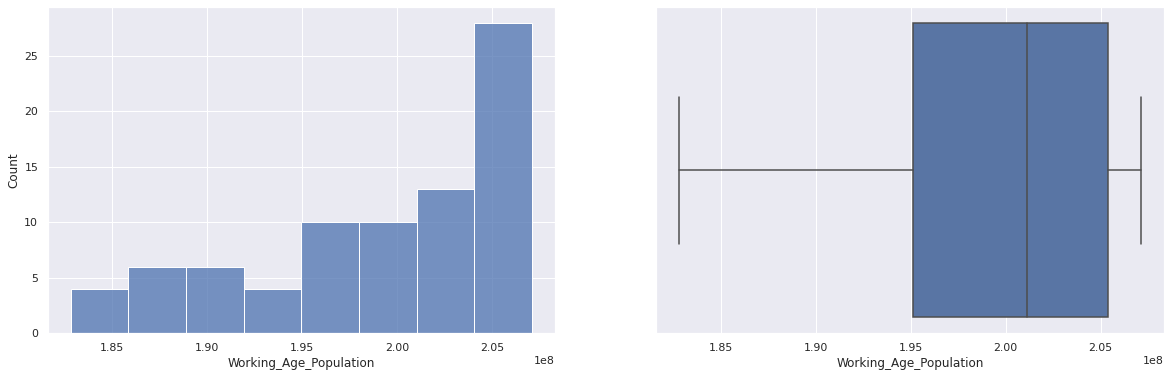

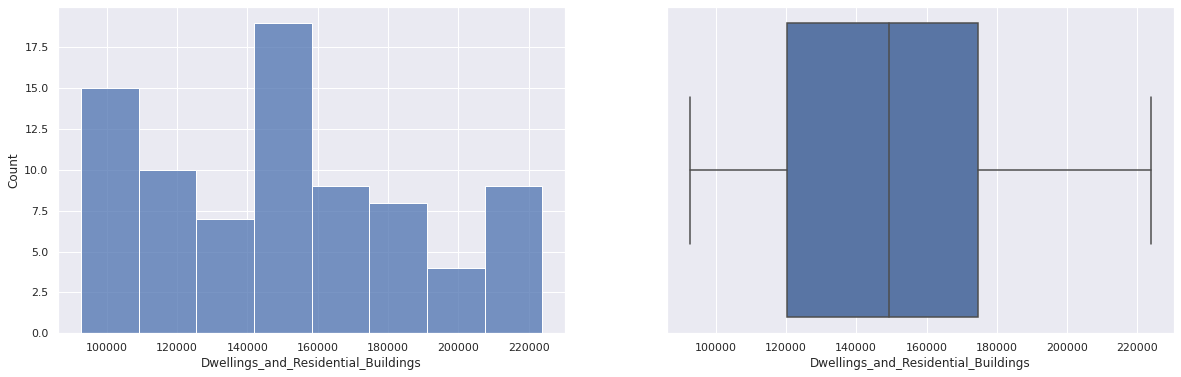

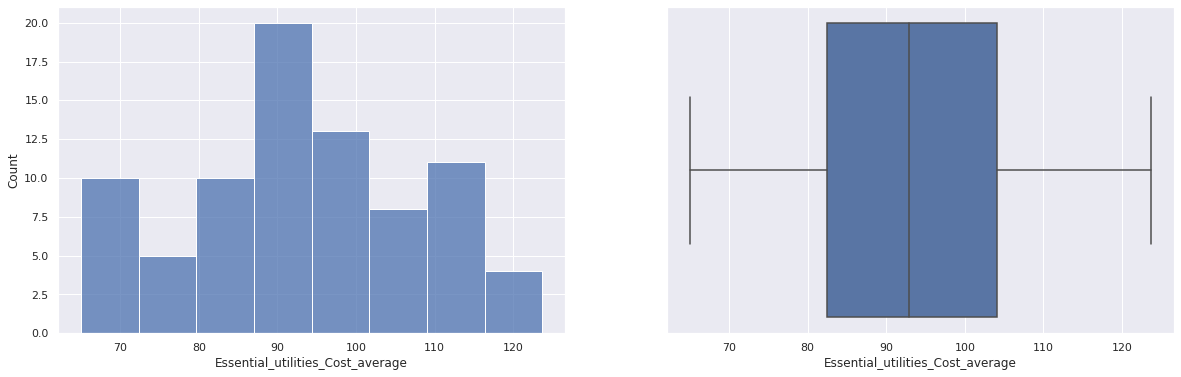

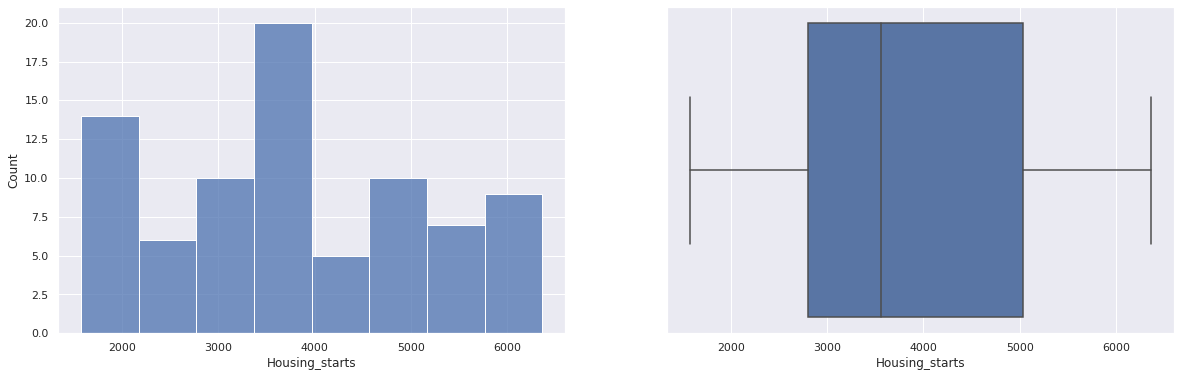

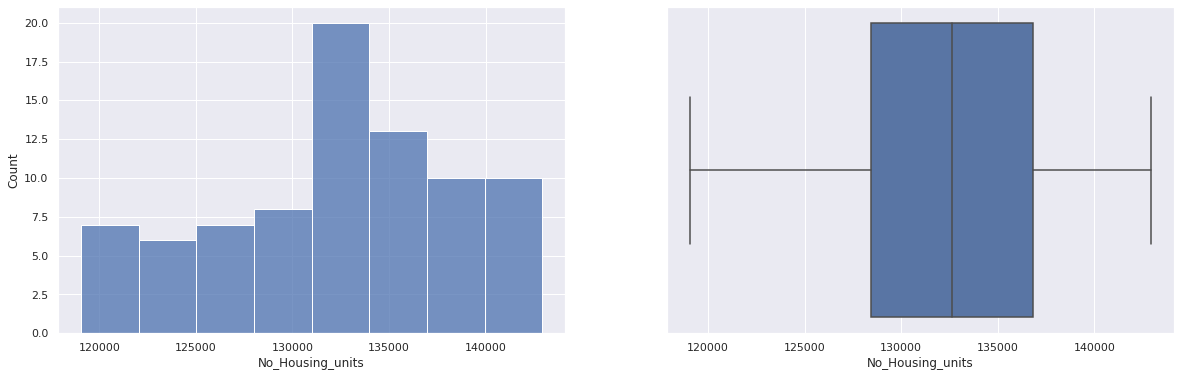

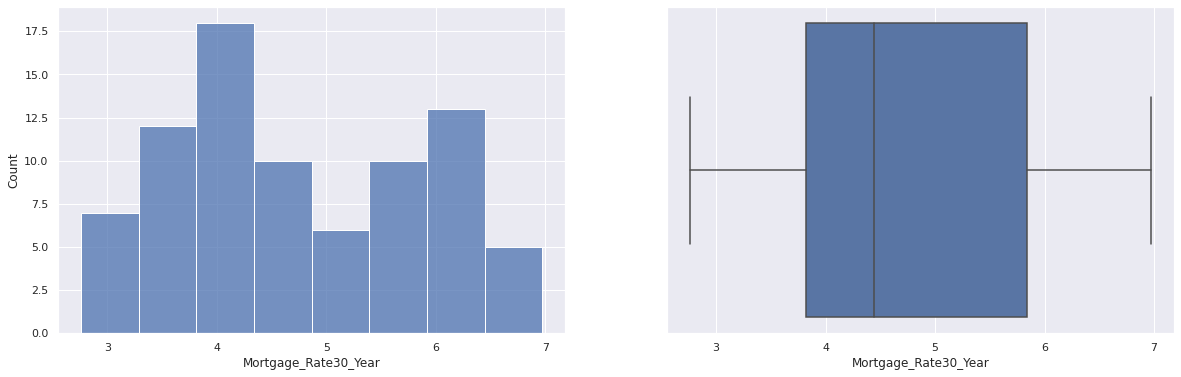

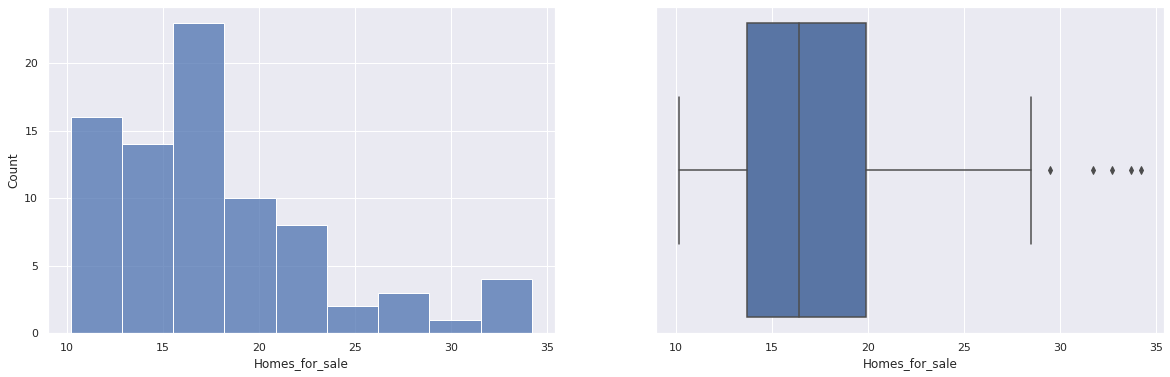

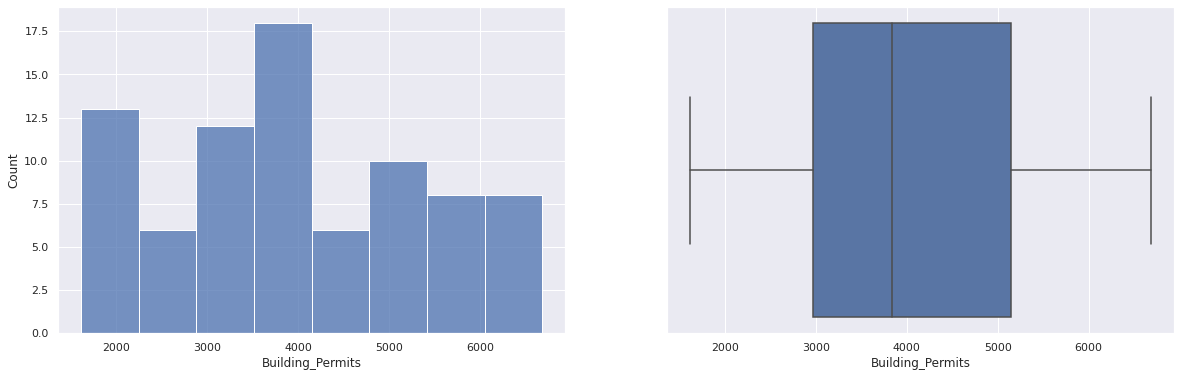

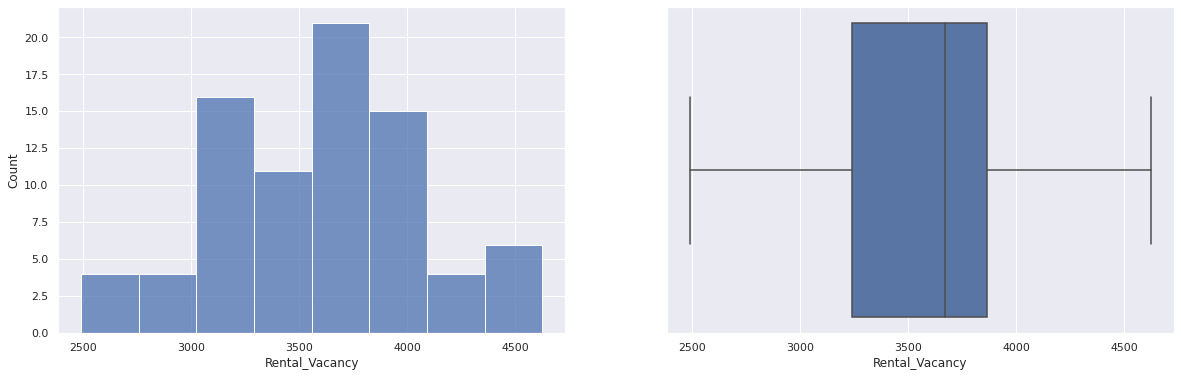

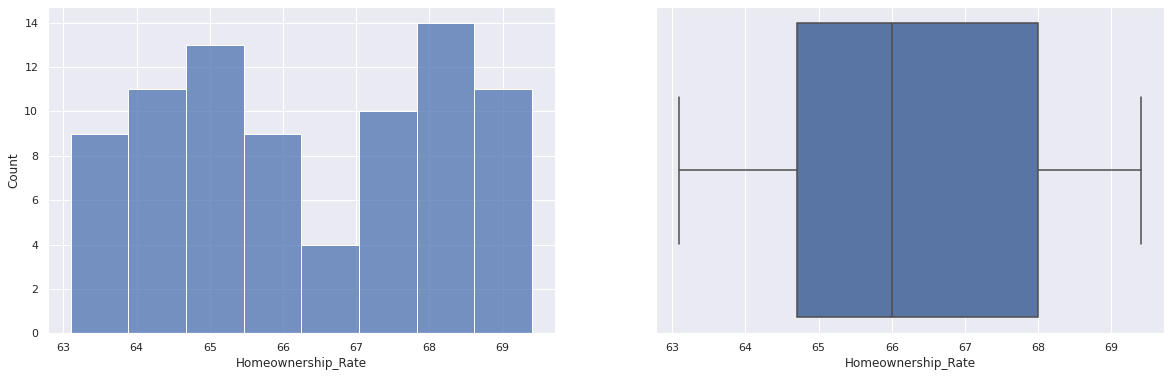

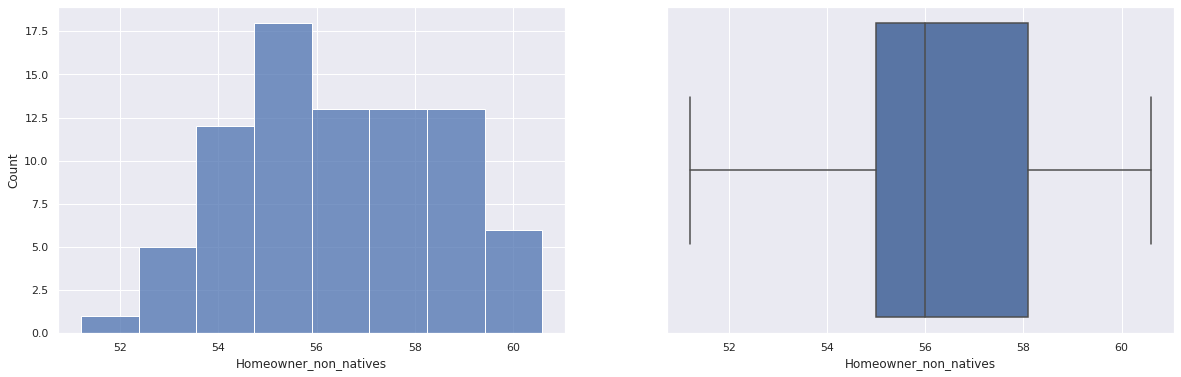

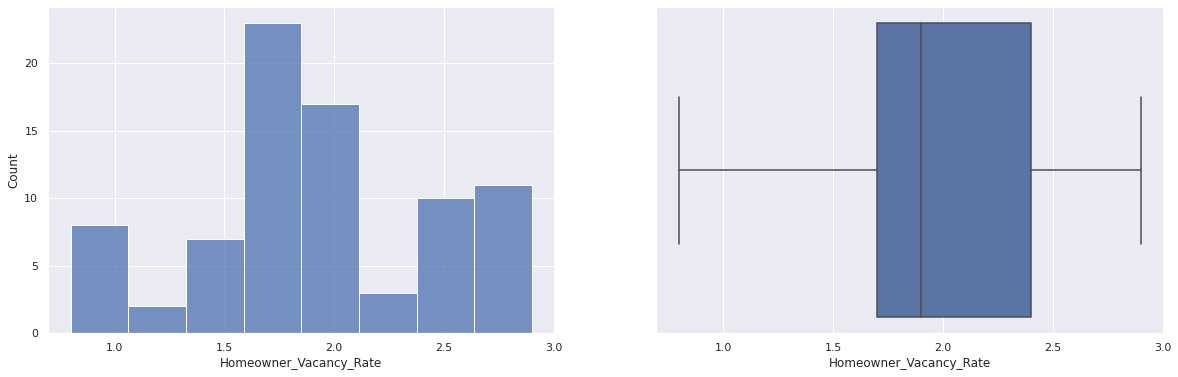

In [ ]:
numerical = df.select_dtypes('number').columns
feature_list = df.columns
for i in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(20,6))
    sns.histplot(data=df, x=i, ax=ax[0])
    sns.boxplot(x=i, data=df, width=0.9, ax=ax[1])

In [ ]:
df.columns

Index(['DATE', 'Price$', 'Unemployment_Rate', 'Employment_Rate', 'GDP',
       'Working_Age_Population', 'Dwellings_and_Residential_Buildings',
       'Essential_utilities_Cost_average', 'Housing_starts',
       'No_Housing_units', 'Mortgage_Rate30_Year', 'Homes_for_sale',
       'Building_Permits', 'Rental_Vacancy', 'Homeownership_Rate',
       'Homeowner_non_natives', 'Homeowner_Vacancy_Rate'],
      dtype='object')

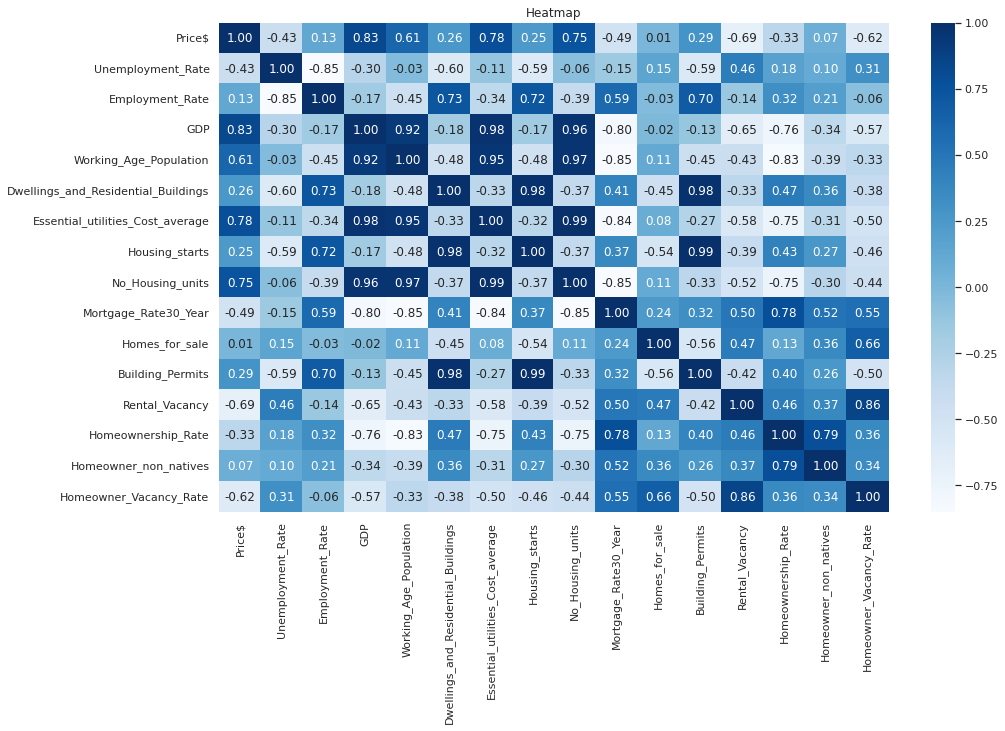

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Heatmap')
plt.xticks(rotation=90)
plt.show()

### **Outliers**

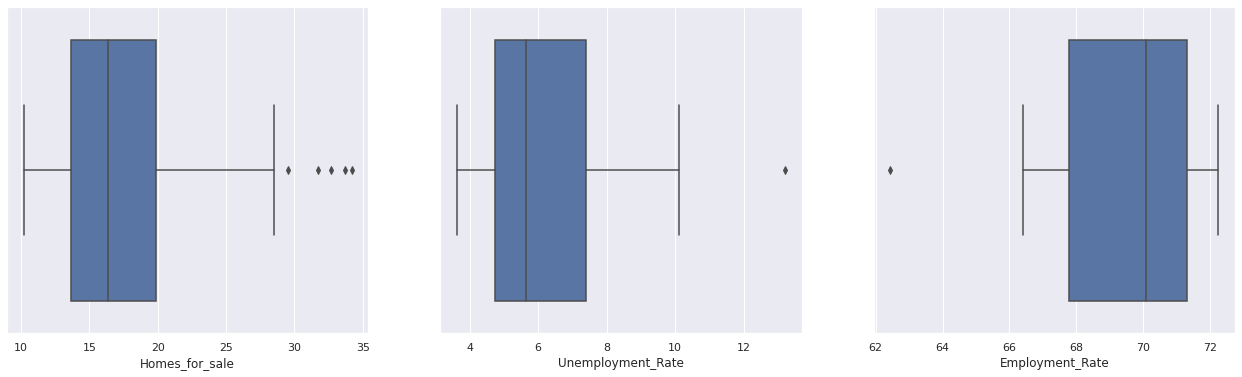

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(22,6))
sns.boxplot(df['Homes_for_sale'],  ax=ax[0])
sns.boxplot(df['Unemployment_Rate'],  ax=ax[1])
sns.boxplot(df['Employment_Rate'],  ax=ax[2])

In [ ]:
df.drop('DATE', axis=1, inplace=True)

In [ ]:
df.head()

,Price$,Unemployment_Rate,Employment_Rate,GDP,Working_Age_Population,Dwellings_and_Residential_Buildings,Essential_utilities_Cost_average,Housing_starts,No_Housing_units,Mortgage_Rate30_Year,Homes_for_sale,Building_Permits,Rental_Vacancy,Homeownership_Rate,Homeowner_non_natives,Homeowner_Vacancy_Rate
0,353.674,5.805100,72.160431,3348727.5,182810138.0,169890.0,65.036667,5169,119061,6.971538,12.3,5143,3403,67.9,53.5,1.7
1,362.148,5.915628,71.927346,3369339.0,183479837.3,174066.8,65.710000,5073,119483,6.813077,12.5,5143,3176,67.8,55.3,1.7
2,371.499,5.776747,71.904513,3382935.3,184160854.6,174738.3,66.796667,5092,119909,6.289231,12.1,5236,3375,67.9,54.0,1.7
3,380.025,5.937977,71.667275,3387355.3,184720284.3,177653.3,66.500000,5189,120350,6.075385,12.0,5466,3479,68.2,55.2,1.7
4,387.964,5.956569,71.502400,3404858.5,185858601.6,181073.8,67.930000,5208,120792,5.840769,12.6,5419,3568,68.1,55.7,1.7


In [ ]:
from scipy.stats import skew
print(round(skew(df['Price$']),2))

1.08


## **Linear Regression**

**Data Split: Split the data into test and train**

**Extracting the target for training set and test set**

In [ ]:
df1 = df.copy()
df1.head()

,Price$,Unemployment_Rate,Employment_Rate,GDP,Working_Age_Population,Dwellings_and_Residential_Buildings,Essential_utilities_Cost_average,Housing_starts,No_Housing_units,Mortgage_Rate30_Year,Homes_for_sale,Building_Permits,Rental_Vacancy,Homeownership_Rate,Homeowner_non_natives,Homeowner_Vacancy_Rate
0,353.674,5.805100,72.160431,3348727.5,182810138.0,169890.0,65.036667,5169,119061,6.971538,12.3,5143,3403,67.9,53.5,1.7
1,362.148,5.915628,71.927346,3369339.0,183479837.3,174066.8,65.710000,5073,119483,6.813077,12.5,5143,3176,67.8,55.3,1.7
2,371.499,5.776747,71.904513,3382935.3,184160854.6,174738.3,66.796667,5092,119909,6.289231,12.1,5236,3375,67.9,54.0,1.7
3,380.025,5.937977,71.667275,3387355.3,184720284.3,177653.3,66.500000,5189,120350,6.075385,12.0,5466,3479,68.2,55.2,1.7
4,387.964,5.956569,71.502400,3404858.5,185858601.6,181073.8,67.930000,5208,120792,5.840769,12.6,5419,3568,68.1,55.7,1.7


In [ ]:
X = df1.drop("Price$", axis=1)
y = df1.pop("Price$")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
S_X = minmax.fit_transform(X)
S_X = pd.DataFrame(S_X, columns=X.columns)  # ideally the training and test should be 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(S_X, y, test_size=0.30 , random_state=40)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (56, 15)
X_test (25, 15)
y_train (56,)
y_test (25,)


In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

### **Rsquare**

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print('The model score on traing set: ', round(regression_model.score(X_train, y_train),3))
print('The model score on test set: ', round(regression_model.score(X_test, y_test),3))

The model score on traing set:  0.981
The model score on test set:  0.977


In [ ]:
ytest_predict =  regression_model.predict(X_test)
ytrain_predict = regression_model.predict(X_train)

In [ ]:
print('The model MSE on traing set: ', round(mean_squared_error(y_train,ytrain_predict),3))
print('The model MSE on test set: ', round(mean_squared_error(y_test,ytest_predict),3))

The model MSE on traing set:  211.007
The model MSE on test set:  214.717


In [ ]:
print('The model R Squared on traing set: ', round(r2_score(y_train,ytrain_predict),3))
print('The model R Squared on test set: ', round(r2_score(y_test,ytest_predict),3))

The model R Squared on traing set:  0.981
The model R Squared on test set:  0.977


### **Adj Rsquare**

In [ ]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
data_train.columns = data_train.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('$','').str.replace('[', '_').str.replace(']', '').str.replace('-', '_').str.replace('No._Housing_units', 'No_Housing_units')
data_train.head()

,Unemployment_Rate,Employment_Rate,GDP,Working_Age_Population,Dwellings_and_Residential_Buildings,Essential_utilities_Cost_average,Housing_starts,No_Housing_units,Mortgage_Rate30_Year,Homes_for_sale,Building_Permits,Rental_Vacancy,Homeownership_Rate,Homeowner_non_natives,Homeowner_Vacancy_Rate,Price
76,0.270448,0.607493,0.882921,0.912437,0.665525,0.861691,0.661789,0.943546,0.027339,0.116667,0.738410,0.323336,0.396825,0.627660,0.047619,726.425
25,0.186162,0.898619,0.374001,0.559612,0.295628,0.422887,0.304139,0.470810,0.789919,0.895833,0.309134,0.716495,0.793651,0.765957,0.952381,500.012
62,0.079893,0.798696,0.737956,0.943124,0.443061,0.710477,0.411580,0.766103,0.266725,0.291667,0.439140,0.504686,0.126984,0.372340,0.380952,578.008
21,0.097645,0.948541,0.340468,0.519634,0.618398,0.321301,0.580268,0.411550,0.854405,0.550000,0.543302,0.596064,0.825397,0.872340,0.857143,544.866
45,0.422382,0.498663,0.478757,0.799756,0.211443,0.516514,0.214674,0.600846,0.216488,0.120833,0.264549,0.534208,0.317460,0.351064,0.523810,458.569


In [ ]:
data_test.columns = data_test.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[', '_').str.replace(']', '').str.replace('-', '_').str.replace('No._Housing_units', 'No_Housing_units')

In [ ]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Price ~ Unemployment_Rate+Employment_Rate+GDP+Working_Age_Population+Dwellings_and_Residential_Buildings+Essential_utilities_Cost_average+Housing_starts+No_Housing_units+Mortgage_Rate30_Year+Homes_for_sale+Building_Permits+Rental_Vacancy+Homeownership_Rate+Homeowner_non_natives+Homeowner_Vacancy_Rate', data = data_train).fit()
lm1.params

Intercept                              250.135929
Unemployment_Rate                     -111.393502
Employment_Rate                       -122.591736
GDP                                   -103.794405
Working_Age_Population                -385.388156
Dwellings_and_Residential_Buildings     39.812456
Essential_utilities_Cost_average       340.770036
Housing_starts                          59.519413
No_Housing_units                       610.928396
Mortgage_Rate30_Year                    44.072347
Homes_for_sale                          47.944950
Building_Permits                       154.545212
Rental_Vacancy                         -21.431163
Homeownership_Rate                       4.297788
Homeowner_non_natives                   -1.429196
Homeowner_Vacancy_Rate                 100.483255
dtype: float64

In [ ]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     140.3
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           1.06e-29
Time:                        14:46:37   Log-Likelihood:                -229.31
No. Observations:                  56   AIC:                             490.6
Df Residuals:                      40   BIC:                             523.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [ ]:
model2 = smf.ols(formula= 'Price ~ Working_Age_Population+Essential_utilities_Cost_average+No_Housing_units+Homes_for_sale+Building_Permits+Homeowner_Vacancy_Rate', data = data_train).fit()
model2.params

Intercept                           125.529170
Working_Age_Population             -310.247365
Essential_utilities_Cost_average    298.178681
No_Housing_units                    477.999072
Homes_for_sale                       63.245186
Building_Permits                    262.327686
Homeowner_Vacancy_Rate              102.555950
dtype: float64

In [ ]:
print(model2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     350.7
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           1.82e-38
Time:                        14:46:37   Log-Likelihood:                -234.88
No. Observations:                  56   AIC:                             483.8
Df Residuals:                      49   BIC:                             497.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [ ]:
mse = np.mean((model2.predict(data_train.drop('Price',axis=1))-data_train['Price'])**2)
mse

257.4302723856639

In [ ]:
print('The model RMSE on traing set: ', round(np.sqrt(mse),3))

The model RMSE on traing set:  16.045


In [ ]:
ytest_predict =  model2.predict(X_test)

### **Mean sqaure error**

In [ ]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test,ytest_predict)
print('The model RMSE on test set: ', round(np.sqrt(mse_test),3))

The model RMSE on test set:  11.78


In [ ]:
for i,j in np.array(model2.params.reset_index()):
  print('({}) * {} +'.format(round(j,2),i),end=' ')

(125.53) * Intercept + (-310.25) * Working_Age_Population + (298.18) * Essential_utilities_Cost_average + (478.0) * No_Housing_units + (63.25) * Homes_for_sale + (262.33) * Building_Permits + (102.56) * Homeowner_Vacancy_Rate + 

In [ ]:
lr_train_RMSE=metrics.mean_squared_error(y_train,ytrain_predict, squared=False)
lr_train_MSE=metrics.mean_squared_error(y_train,ytrain_predict)
lr_train_MAPE=metrics.mean_absolute_percentage_error(y_train,ytrain_predict)
lr_train_MAE=metrics.mean_absolute_error(y_train,ytrain_predict)
lr_train_score=regression_model.score(X_train, y_train)

In [ ]:
lr_test_RMSE=metrics.mean_squared_error(y_test,ytest_predict, squared=False)
lr_test_MSE=metrics.mean_squared_error(y_test,ytest_predict)
lr_test_MAPE=metrics.mean_absolute_percentage_error(y_test,ytest_predict)
lr_test_MAE=metrics.mean_absolute_error(y_test,ytest_predict)
lr_test_score=regression_model.score(X_test, y_test)

## **Decision Tree**

In [ ]:
df.head()

,Price$,Unemployment_Rate,Employment_Rate,GDP,Working_Age_Population,Dwellings_and_Residential_Buildings,Essential_utilities_Cost_average,Housing_starts,No_Housing_units,Mortgage_Rate30_Year,Homes_for_sale,Building_Permits,Rental_Vacancy,Homeownership_Rate,Homeowner_non_natives,Homeowner_Vacancy_Rate
0,353.674,5.805100,72.160431,3348727.5,182810138.0,169890.0,65.036667,5169,119061,6.971538,12.3,5143,3403,67.9,53.5,1.7
1,362.148,5.915628,71.927346,3369339.0,183479837.3,174066.8,65.710000,5073,119483,6.813077,12.5,5143,3176,67.8,55.3,1.7
2,371.499,5.776747,71.904513,3382935.3,184160854.6,174738.3,66.796667,5092,119909,6.289231,12.1,5236,3375,67.9,54.0,1.7
3,380.025,5.937977,71.667275,3387355.3,184720284.3,177653.3,66.500000,5189,120350,6.075385,12.0,5466,3479,68.2,55.2,1.7
4,387.964,5.956569,71.502400,3404858.5,185858601.6,181073.8,67.930000,5208,120792,5.840769,12.6,5419,3568,68.1,55.7,1.7


In [ ]:
X = df.drop("Price$", axis=1)
y = df.pop("Price$")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 123, max_depth=3)
dt_model = tree.fit(X_train, y_train)

### **Rsquare**

In [ ]:
print('The model R-squared score on train set: ', round(dt_model.score(X_train, y_train),3))
print('The model R-squared score on test set: ', round(dt_model.score(X_test, y_test),3))

The model R-squared score on train set:  0.928
The model R-squared score on test set:  0.921


In [ ]:
y_predict_train = dt_model.predict(X_train)
y_predict_test = dt_model.predict(X_test)

In [ ]:
mse_train= mean_squared_error(y_train,y_predict_train)
mse_test= mean_squared_error(y_test,y_predict_test)
print('The model MSE on train set: ', round(mse_train,3))
print('The model MSE on test set: ', round(mse_train,3))

The model MSE on train set:  446.6
The model MSE on test set:  446.6


In [ ]:
print('The model RMSE on train set: ', round(mse_train**(1/2.0),3))
print('The model RMSE on test set: ', round(mse_test**(1/2.0),3))

The model RMSE on train set:  21.133
The model RMSE on test set:  38.813


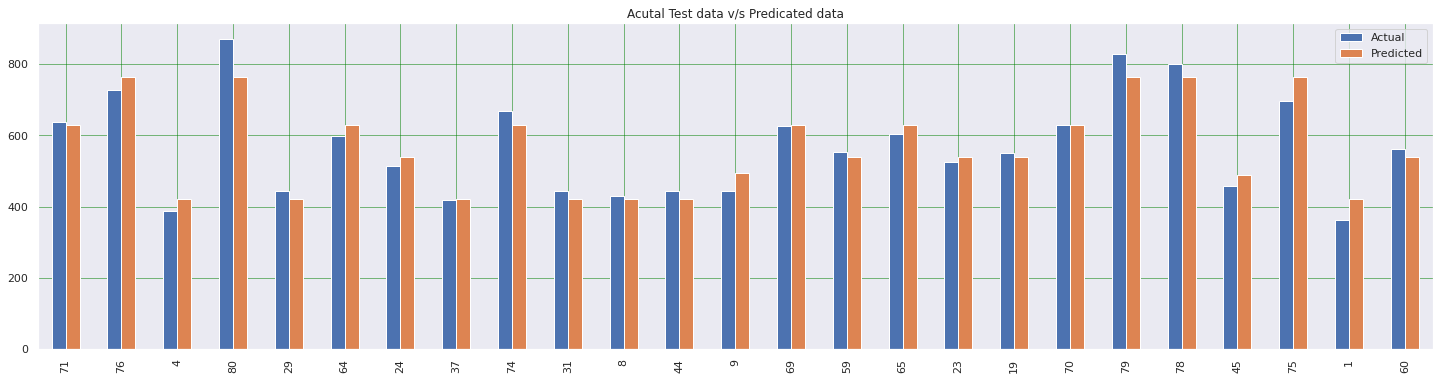

In [ ]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_test})
df_temp = df_temp.head(100)
df_temp.plot(kind='bar',figsize=(25,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Acutal Test data v/s Predicated data')
plt.show()

In [ ]:
dt_train_RMSE=metrics.mean_squared_error(y_train,y_predict_train, squared=False)
dt_train_MSE=metrics.mean_squared_error(y_train,y_predict_train)
dt_train_MAE=metrics.mean_absolute_error(y_train,y_predict_train)
dt_train_score=dt_model.score(X_train, y_train)

In [ ]:
dt_test_RMSE=metrics.mean_squared_error(y_test,y_predict_test, squared=False)
dt_test_MSE=metrics.mean_squared_error(y_test,y_predict_test)
dt_test_MAE=metrics.mean_absolute_error(y_test,y_predict_test)
dt_test_score=dt_model.score(X_test, y_test)

## **Model training - Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 123)
rf_model = rf.fit(X_train, y_train)

### **Rsquare**

In [ ]:
print('The model R-squared score on train set: ', round(rf_model.score(X_train, y_train),3))
print('The model R-squared score on test set: ', round(rf_model.score(X_test, y_test),3))

The model R-squared score on train set:  0.973
The model R-squared score on test set:  0.821


In [ ]:
y_predict_train = rf_model.predict(X_train)
y_predict_test = rf_model.predict(X_test)

In [ ]:
mse_train= metrics.mean_squared_error(y_train,y_predict_train)
mse_test= metrics.mean_squared_error(y_test,y_predict_test)
print('The model MSE on train set: ', round(mse_train,3))
print('The model MSE on test set: ', round(mse_train,3))

The model MSE on train set:  166.302
The model MSE on test set:  166.302


In [ ]:
print('The model RMSE on train set: ', round(mse_train**(1/2.0),3))
print('The model RMSE on test set: ', round(mse_test**(1/2.0),3))

The model RMSE on train set:  12.896
The model RMSE on test set:  58.357


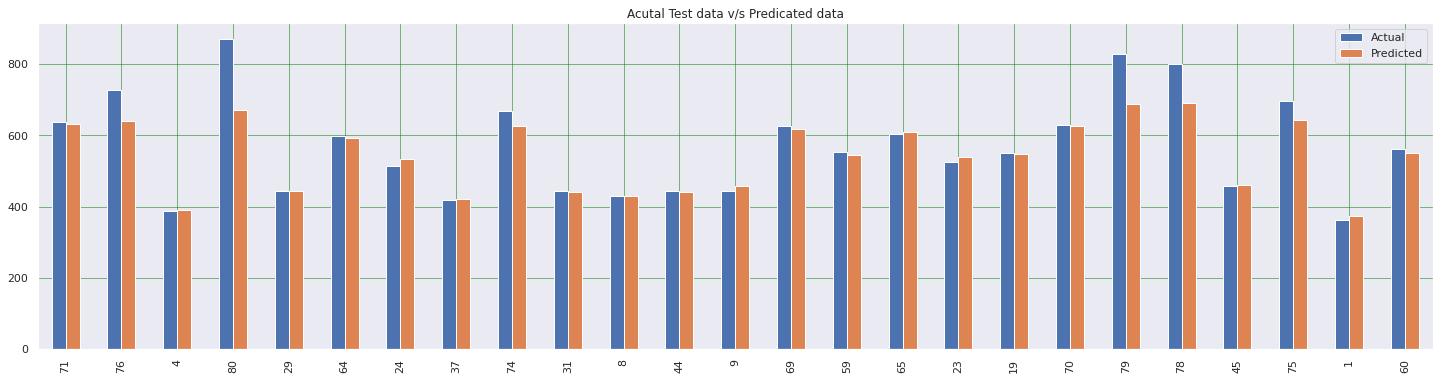

In [ ]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_test})
df_temp = df_temp.head(100)
df_temp.plot(kind='bar',figsize=(25,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Acutal Test data v/s Predicated data')
plt.show()

In [ ]:
rf_train_RMSE=metrics.mean_squared_error(y_train,y_predict_train, squared=False)
rf_train_MSE=metrics.mean_squared_error(y_train,y_predict_train)
rf_train_MAE=metrics.mean_absolute_error(y_train,y_predict_train)
rf_train_score=rf_model.score(X_train, y_train)

In [ ]:
rf_test_RMSE=metrics.mean_squared_error(y_test,y_predict_test, squared=False)
rf_test_MSE=metrics.mean_squared_error(y_test,y_predict_test)
rf_test_MAE=metrics.mean_absolute_error(y_test,y_predict_test)
rf_test_score=rf_model.score(X_test, y_test)

## **Model training - ANN**

### **Scaling-MinMaxScaler normalizes the data using the formula (x - min)/(max - min)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
S_X = minmax.fit_transform(X)
S_X = pd.DataFrame(S_X, columns=X.columns)  # ideally the training and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(S_X, y, test_size=0.30 , random_state=40)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (56, 15)
X_test (25, 15)
y_train (56,)
y_test (25,)


In [ ]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(random_state = 123, learning_rate_init=0.1)
ann_model = ann.fit(X_train, y_train)

### **Rsquare**

In [ ]:
print('The model R-squared score on train set: ', round(ann_model.score(X_train, y_train),3))
print('The model R-squared score on test set: ', round(ann_model.score(X_test, y_test),3))

The model R-squared score on train set:  0.958
The model R-squared score on test set:  0.961


In [ ]:
y_predict_train = ann_model.predict(X_train)
y_predict_test = ann_model.predict(X_test)

In [ ]:
from sklearn import metrics
mse_train= metrics.mean_squared_error(y_train,y_predict_train)
mse_test= metrics.mean_squared_error(y_test,y_predict_test)
print('The model MSE on train set: ', round(mse_train,3))
print('The model MSE on test set: ', round(mse_train,3))

The model MSE on train set:  480.314
The model MSE on test set:  480.314


In [ ]:
print('The model RMSE on train set: ', round(mse_train**(1/2.0),3))
print('The model RMSE on test set: ', round(mse_test**(1/2.0),3))

The model RMSE on train set:  21.916
The model RMSE on test set:  18.994


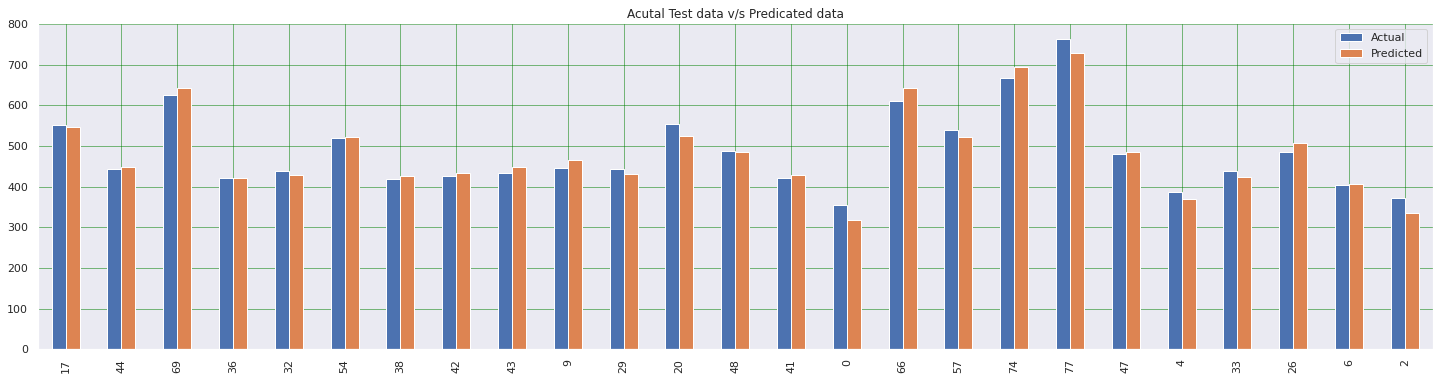

In [ ]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_test})
df_temp = df_temp.head(100)
df_temp.plot(kind='bar',figsize=(25,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Acutal Test data v/s Predicated data')
plt.show()

In [ ]:
ann_train_RMSE=metrics.mean_squared_error(y_train,y_predict_train, squared=False)
ann_train_MSE=metrics.mean_squared_error(y_train,y_predict_train)
ann_train_MAE=metrics.mean_absolute_error(y_train,y_predict_train)
ann_train_score=ann_model.score(X_train, y_train)

In [ ]:
ann_test_RMSE=metrics.mean_squared_error(y_test,y_predict_test, squared=False)
ann_test_MSE=metrics.mean_squared_error(y_test,y_predict_test)
ann_test_MAE=metrics.mean_absolute_error(y_test,y_predict_test)
ann_test_score=ann_model.score(X_test, y_test)

### **Ensemble**

In [ ]:
from sklearn.ensemble import VotingRegressor
model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state=10)
model3 = MLPRegressor(random_state=10, learning_rate_init=0.1)
model = VotingRegressor(estimators=[('regression_model', model1), ('tree', model2), ('ann', model3)])
model.fit(X_train,y_train)
Em_test = model.score(X_test,y_test)
Em_train = model.score(X_train,y_train)

In [ ]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

MLPRegressor(learning_rate_init=0.1, random_state=10)

In [ ]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [ ]:
pred = model.predict(X_test)
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
finalpred=(pred+pred1+pred2+pred3)/4
print('The final ensemble model predictions on test set value is as follows: ', finalpred,3)

The final ensemble model predictions on test set value is as follows:  [548.78436601 461.17846531 623.61814652 442.67701968 437.06142252
 521.78049382 429.11436487 420.06537604 442.44421161 457.96624981
 434.85209225 537.28076917 479.8272219  415.66255124 347.66241365
 621.02309131 529.90405792 694.6778449  729.19026347 486.50291849
 375.74050218 425.94018125 488.59080748 413.9343083  356.44851683] 3


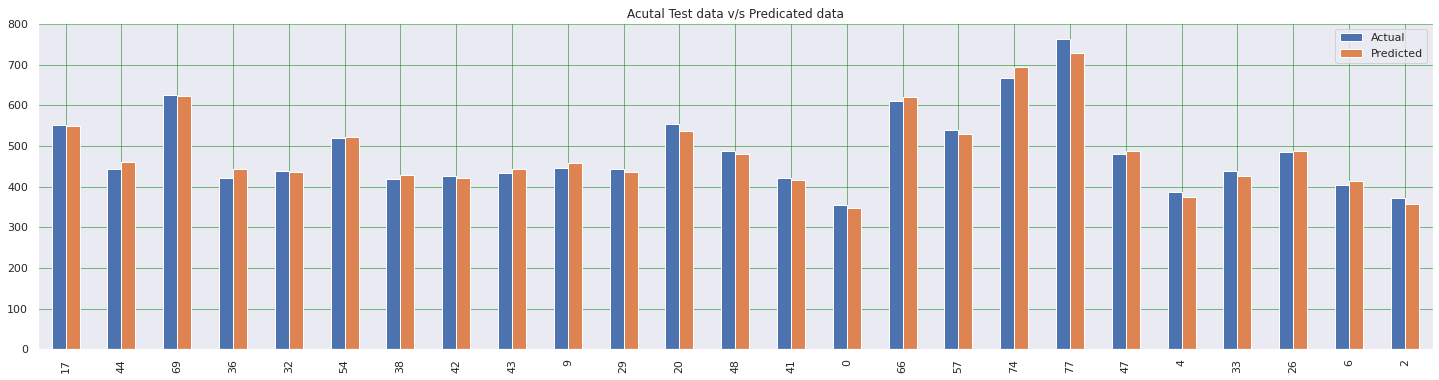

In [ ]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_test})
df_temp = df_temp.head(100)
df_temp.plot(kind='bar',figsize=(25,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Acutal Test data v/s Predicated data')
plt.show()

In [ ]:
Em_train_RMSE=metrics.mean_squared_error(y_train,y_predict_train, squared=False)
Em_train_MSE=metrics.mean_squared_error(y_train,y_predict_train)
Em_train_MAE=metrics.mean_absolute_error(y_train,y_predict_train)
Em_train_score=model.score(X_train, y_train)

In [ ]:
Em_test_RMSE=metrics.mean_squared_error(y_test,pred, squared=False)
Em_test_MSE=metrics.mean_squared_error(y_test,pred)
Em_test_MAE=metrics.mean_absolute_error(y_test,pred)
Em_test_score=model.score(X_test, y_test)

# **Compare**

In [ ]:
index=['MAE', 'MSE', 'RMSE', 'Score']
data = pd.DataFrame({'LR Train':[lr_train_MAE,lr_train_MSE,lr_train_RMSE, lr_train_score],
       'LR Test':[lr_test_MAE,lr_test_MSE,lr_test_RMSE, lr_test_score],
       'Decision Tree Train':[dt_train_MAE,dt_train_MSE,dt_train_RMSE, dt_train_score],
       'Decision Tree Test':[dt_test_MAE,dt_test_MSE,dt_test_RMSE, dt_test_score], 
       'Random Forest Train':[rf_train_MAE,rf_train_MSE,rf_train_RMSE, rf_train_score],
       'Random Forest Test':[rf_test_MAE,rf_test_MSE,rf_test_RMSE, rf_test_score],
       'ANN Train':[ann_train_MAE,ann_train_MSE,ann_train_RMSE, ann_train_score],
       'ANN Test':[ann_test_MAE,ann_test_MSE,ann_test_RMSE, ann_test_score],
       'Emsemble Train':[Em_train_MAE,Em_train_MSE,Em_train_RMSE, Em_train], 
       'Emsemble Test':[Em_test_MAE,Em_test_MSE,Em_test_RMSE, Em_test]},index=index)
round(data,2)

,LR Train,LR Test,Decision Tree Train,Decision Tree Test,Random Forest Train,Random Forest Test,ANN Train,ANN Test,Emsemble Train,Emsemble Test
MAE,10.94,8.63,15.11,30.38,5.40,30.01,15.20,15.32,7.90,10.72
MSE,211.01,138.76,446.60,1506.48,166.30,3405.49,480.31,360.76,123.23,174.33
RMSE,14.53,11.78,21.13,38.81,12.90,58.36,21.92,18.99,11.10,13.20
Score,0.98,0.98,0.93,0.92,0.97,0.82,0.96,0.96,0.99,0.98
